In [1]:
import datetime
import os
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import seaborn as sn
import snowflake.connector

In [2]:
# get connection info from the environment
# - in bash, `export SNOWSQL_VARIABLE=...`
# - or put these lines in a file and run `source snow.env`
ACCOUNT = os.getenv("SNOWSQL_ACCOUNT")
USER = os.getenv("SNOWSQL_USER")
PASSWORD = os.getenv('SNOWSQL_PWD')
WAREHOUSE = os.getenv('SNOWSQL_WAREHOUSE')

In [3]:
 con = snowflake.connector.connect(
    account=ACCOUNT,
    user=USER,
    password=PASSWORD,
    warehouse=WAREHOUSE,
    session_parameters={
        'QUERY_TAG': 'python_notebook',
    }
)

In [4]:
con

In [5]:
con.cursor().execute("USE DATABASE twitter")
con.cursor().execute("USE SCHEMA processed")

In [6]:
# this is a basic way to read query results, we'll use pandas instead
#cur = con.cursor()
#try:
#    cur.execute("SELECT count, year, month, day FROM twitter.processed.volume")
#    for (count, year, month, day) in cur:
#        print('{0}, {1}, {2}, {3}'.format(count, year, month, day))
#finally:
#    cur.close()

In [7]:
#import pandas

In [8]:
cur = con.cursor()
cur.execute("SELECT count, year, month, day FROM twitter.processed.volume")

In [9]:
# load into pandas dataframe
df = cur.fetch_pandas_all()

In [10]:
# convert y/m/d to datetime
dates = [datetime.datetime(year=row['YEAR'], month=row['MONTH'], day=row['DAY'])
        for _idx, row in df.iterrows()]
#dates = [row for _idx, row in df.iterrows()]

In [11]:
dates[0]

datetime.datetime(2021, 4, 15, 0, 0)

In [12]:
# add column
df['DATE'] = dates

<AxesSubplot:xlabel='DATE', ylabel='COUNT'>

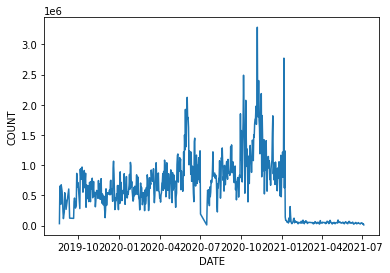

In [13]:
# basic seaborn plot
sn.lineplot(data=df, x="DATE", y="COUNT")

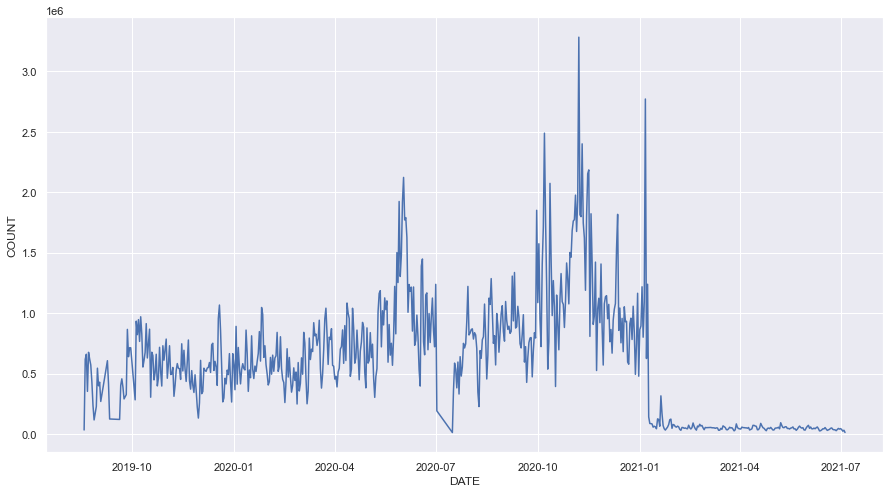

In [14]:
# try setting a wider aspect ratio
sn.set(rc = {'figure.figsize':(15,8)})
#sn.set()
ax = sn.lineplot(data=df, x="DATE", y="COUNT")

In [15]:
# work on getting the axis range/ticks
start, end = min(dates), max(dates)
month_list = [i.strftime("%Y-%m") for i in pd.date_range(start=start, end=end, freq='MS')]

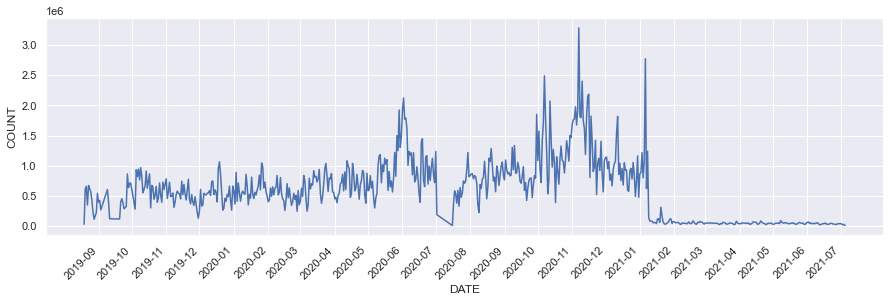

In [16]:
# PLOTTING
fig, ax = plt.subplots(figsize = (15,4))
fig = sn.lineplot(data=df, x="DATE", y="COUNT")
ax.set_xticks(month_list)
ax.set_xticklabels(labels=month_list, rotation=45, ha='right');

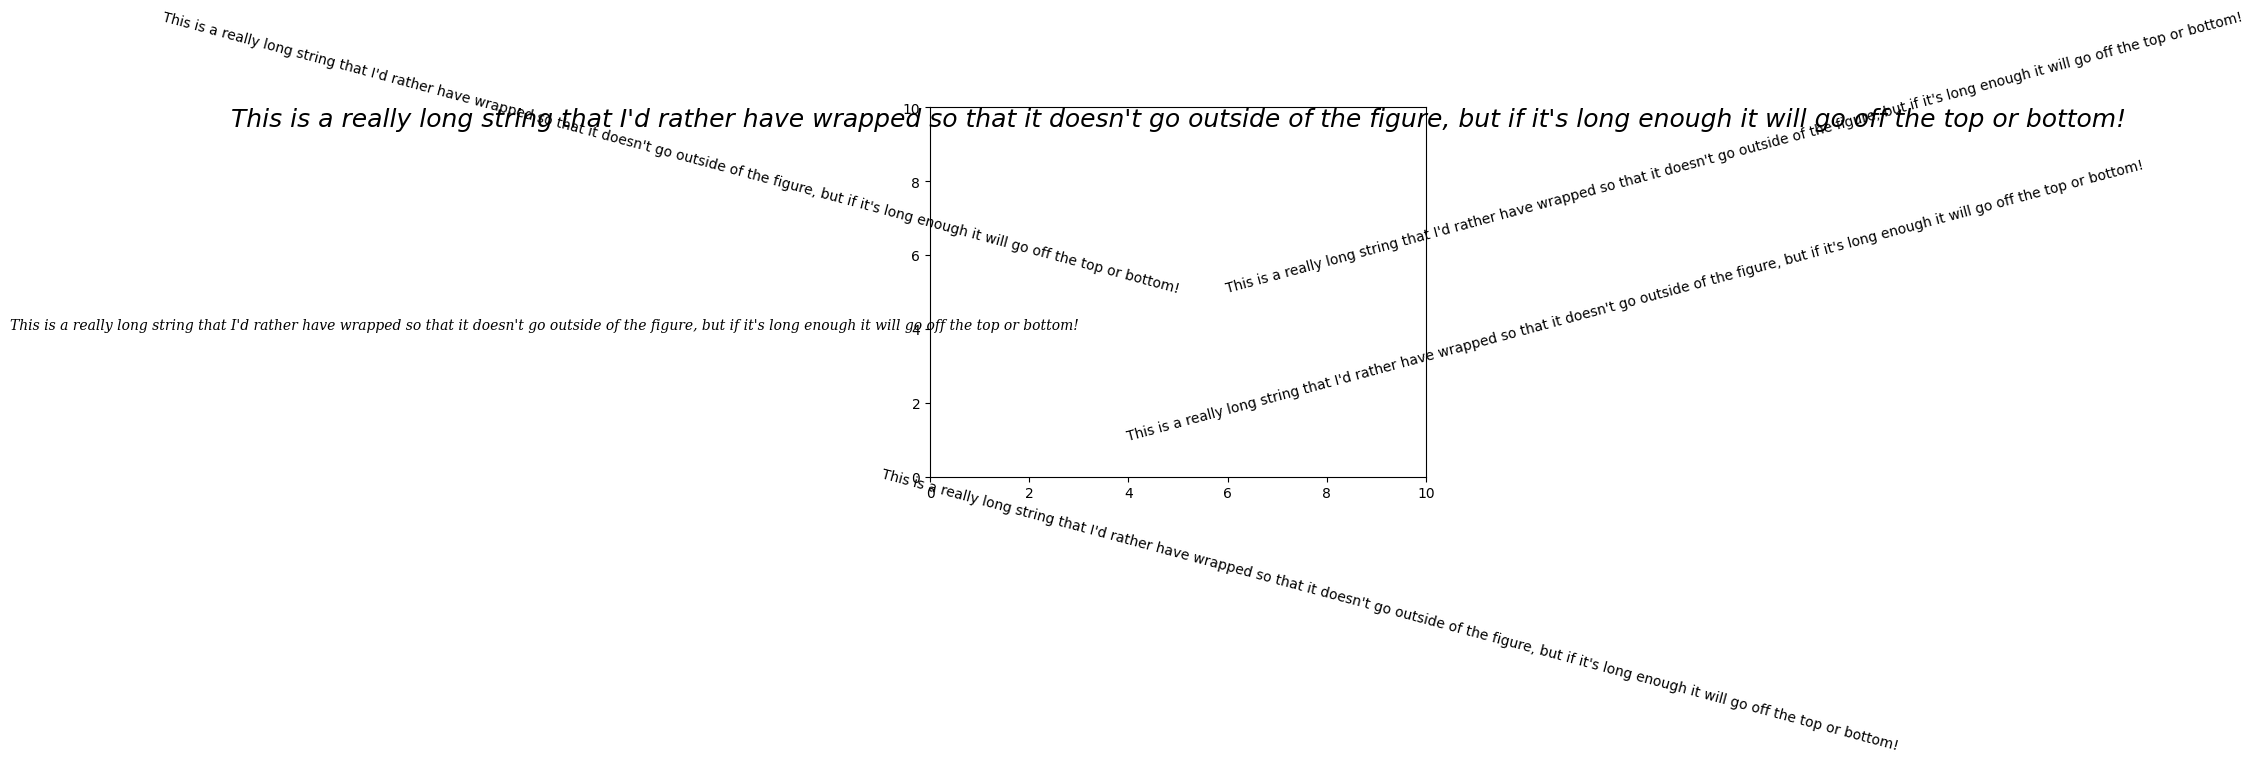

In [17]:
# cf https://matplotlib.org/2.0.2/examples/text_labels_and_annotations/autowrap_demo.html
#plt.figure(figsize=(6.4,4.8))
plt.style.use('default')
fig = plt.figure()
plt.axis([0, 10, 0, 10])
t = "This is a really long string that I'd rather have wrapped so that it"\
    " doesn't go outside of the figure, but if it's long enough it will go"\
    " off the top or bottom!"
plt.text(4, 1, t, ha='left', rotation=15, wrap=True)
plt.text(6, 5, t, ha='left', rotation=15, wrap=True)
plt.text(5, 5, t, ha='right', rotation=-15, wrap=True)
plt.text(5, 10, t, fontsize=18, style='oblique', ha='center',
         va='top', wrap=True)
plt.text(3, 4, t, family='serif', style='italic', ha='right', wrap=True)
plt.text(-1, 0, t, ha='left', rotation=-15, wrap=True)

plt.show()

In [18]:
events = pd.read_csv("../key_dates.tsv", sep="\t", header=None, names=("date_txt", "event"), comment='#')

In [19]:
events

,date_txt,event
0,2019-12-18,First Trump impeachment
1,2020-05-25,George Floyd dies in police custody
2,2020-05-29,Chauvin charged; Curfews announced; MN Nationa...
3,2020-06-08,Seattle Capitol Hill Autonomous Zone started
4,2020-07-01,Seattle Capitol Hill Autonomous Zone cleared b...
5,2020-07-07,Demobilization of MN State National Guard
6,2020-08-23,Shooting of Jacob Blake in Kenosha
7,2020-08-26,Minneapolis false rumor riot
8,2020-10-02,Trump tests positive for COVID
9,2020-11-02,US 2020 presidential election


In [20]:
events['date'] = pd.to_datetime(events['date_txt'])

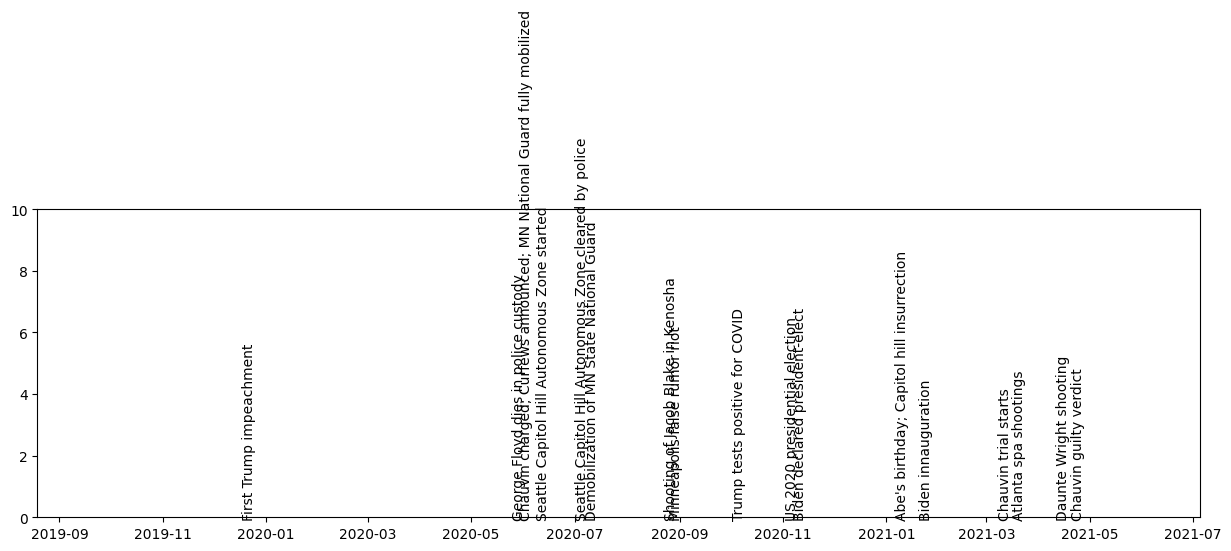

In [21]:
fig, ax = plt.subplots(figsize = (15,4))
plt.axis([min(dates), max(dates), 0, 10])

for _idx, row in events.iterrows():
    plt.text(row['date'], 0, row['event'], rotation=90)

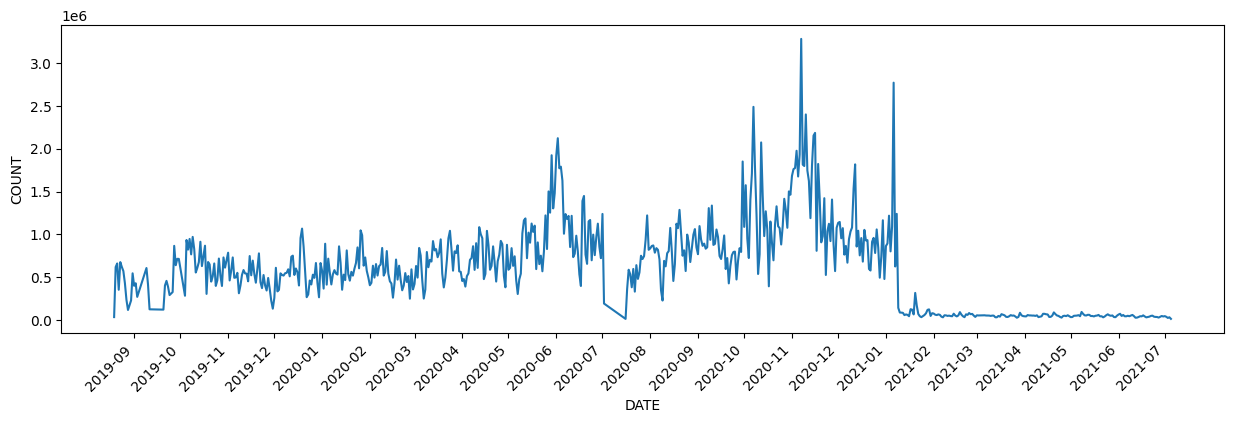

In [22]:
# PLOTTING
fig, ax = plt.subplots(figsize = (15,4))
fig = sn.lineplot(data=df, x="DATE", y="COUNT")
ax.set_xticks(month_list)
ax.set_xticklabels(labels=month_list, rotation=45, ha='right');

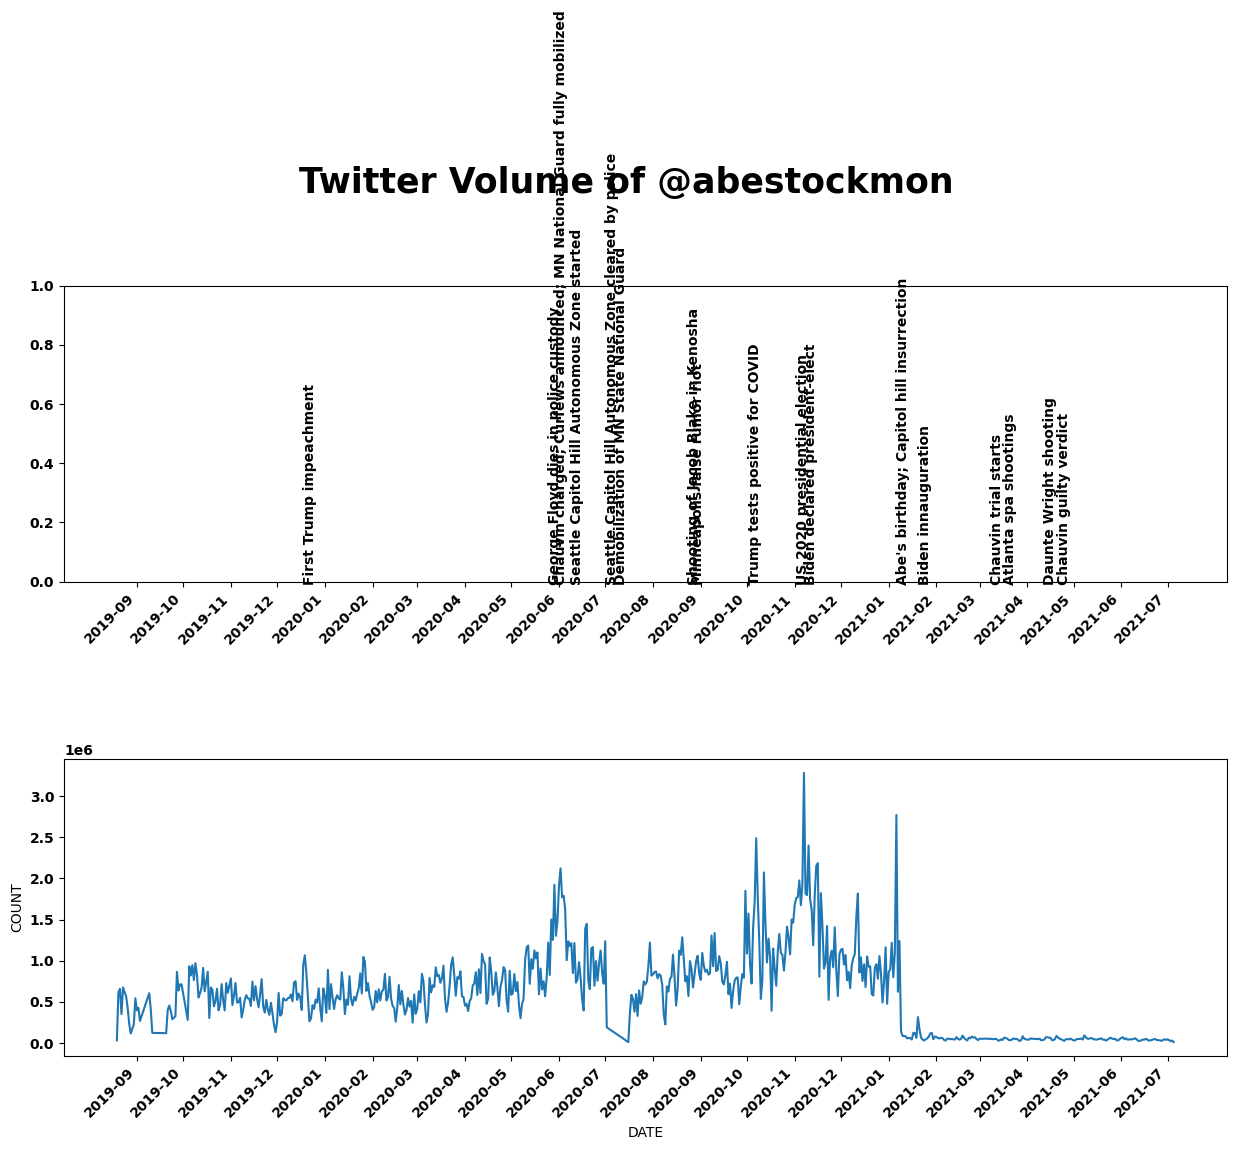

In [24]:
# roughly based on https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html
fig = plt.figure()

plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams["font.weight"] = "bold"

plt.subplots_adjust(hspace=0.60)


fontdicty={'fontsize': 20,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 20,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

fig.suptitle('Twitter Volume of @abestockmon', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.0))

ax1 = fig.add_subplot(212) # 2x1 subplot, plot #2 first to share the x-axis
sn.lineplot(data=df, x="DATE", y="COUNT")
ax1.set_xticks(month_list)
ax1.set_xticklabels(labels=month_list, rotation=45, ha='right');

ax2 = fig.add_subplot(211, sharex=ax1) # 2x1 subplot, plot #1: the event text annotations

#plt.axis([min(dates), max(dates), 0, 10])
for _idx, row in events.iterrows():
    plt.text(row['date'], 0, row['event'], rotation=90)

ax2.set_xticklabels(labels=month_list, rotation=45, ha='right');